<a href="https://colab.research.google.com/github/IrinaFab/MNIST/blob/main/MNIST_IF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Neural Network Model for Digits Classification

The ability to automatically detect and identify predefined patterns from visual data have been a challenging task for scientists and engineers for many years. Experimentation began almost 60 years ago with two neurophysiologists, Hubel and Weisel, when they showed a cat an array of images and discovered that its brain responded first by detecting to hard edges or lines(1). The discovery that the image processing starts with simple shapes like straight edges contributed to developing of various algorithms that can identify specific features in images.

In the current age of digitization, handwritten digit recognition and classification by a computer play an important role in many applications, including postal mail sorting, bank check processing, tax forms, and population census. 

The MNIST handwritten digits dataset is a classic computer vision dataset used for isolated handwritten digit recognition, created by researchers Burges, Cortes, and LeCun from data by the National Institute of Standards and Technology (NIST). The MNIST database was designed from NIST's Special Database 3 consisting of binary images of handwritten digits by Census Bureau employees and Special Database 1 consisting of binary images of handwritten digits by high-school students.

The MNIST dataset contains 70,000 images divided into 60,000 training images and 10,000 test images. There are 5,000 images of the 60,000 training images kept separately for validation purposes.

The neural network model has:
*	a hidden layer with 128 nodes
* a second hidden layer with 64 nodes
* an output layer with 10 nodes, corresponding to the ten classes of the dataset.


Reference:

(1) https://hackernoon.com/a-brief-history-of-computer-vision-and-convolutional-neural-networks-8fe8aacc79f3


## 1. Importing Packages 

In [ ]:
# Basic libraries
import datetime
from packaging import version
from collections import Counter
import numpy as np
import pandas as pd

import random

# Visualization libraries
import matplotlib as mpl  # EA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Evaluation libraries
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score

# Deep learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist

tf.compat.v1.disable_eager_execution() 

# Getting consistent results 
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

%matplotlib inline
np.set_printoptions(precision=3, suppress=True) 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Verifying TensorFlow version and Keras version

In [ ]:
print('This notebook requires TensorFlow 2.0 or above')
print('TensorFlow version:', tf.__version__)
assert version.parse(tf.__version__).release[0] >=2

This notebook requires TensorFlow 2.0 or above
TensorFlow version: 2.8.0


### Mount Google Drive to Colab environment

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Functions for Research Assignment 

In [ ]:
def print_validation_report(test_labels, predictions):
    print('Classification Report')
    print(classification_report(test_labels, predictions))
    print('Accuracy Score: {}'.format(accuracy_score(test_labels, predictions)))
    print('Root Mean Square Error: {}'.format(np.sqrt(MSE(test_labels, predictions)))) 

In [ ]:
def plot_confusion_matrix(labels_true, labels_pred):
    mtx = confusion_matrix(labels_true, labels_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.75,  cbar=False, ax=ax,cmap='Blues',linecolor='white')
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

### Loading MNIST Dataset

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


* Tuples of Numpy arrays: (train_images, train_labels), (test_images, test_labels)
* train_images, train_labels: uint8 arrays of grayscale image data with shapes (num_samples, 28, 28).
* test_images, test_labels: uint8 arrays of digit labels (integers in range 0-9)

### Exploratory Data Analysis (EDA) Training and Testing Sets


In [ ]:
print('train_images:\t{}'.format(train_images.shape))
print('train_labels:\t{}'.format(train_labels.shape))
print('test_images:\t{}'.format(test_images.shape))
print('test_labels:\t{}'.format(test_labels.shape))

train_images:	(60000, 28, 28)
train_labels:	(60000,)
test_images:	(10000, 28, 28)
test_labels:	(10000,)


* Training set is an array of 60000 records and each image is 28X28 pixels. 
* Test set is an array of 10,000 images and each image is 28x28 pixels.
* Each pixel has a value from 0 to 255 describing the pixel intensity, 0 for light and 255 for dark.

### Review labels for training set

In [ ]:
print('First ten labels training dataset:{}'.format(train_labels[0:10]))

First ten labels training dataset:[5 0 4 1 9 2 1 3 1 4]


### Finding frequency of each label in training and test sets

In [ ]:
Counter(train_labels).most_common()

[(1, 6742),
 (7, 6265),
 (3, 6131),
 (2, 5958),
 (9, 5949),
 (0, 5923),
 (6, 5918),
 (8, 5851),
 (4, 5842),
 (5, 5421)]

* The range for distribution of training labels is between 6742 for digit 1 and 5421 for digit 5.
* While there is a difference in the distribution of labels in the training set, the dataset is still balanced to continue the analysis.

In [ ]:
Counter(test_labels).most_common()

[(1, 1135),
 (2, 1032),
 (7, 1028),
 (3, 1010),
 (9, 1009),
 (4, 982),
 (0, 980),
 (8, 974),
 (6, 958),
 (5, 892)]

* The range for distribution of test labels is between 1135 for digit 1 and 892
for digit 5. 
* While there is a difference in the distribution of labels in the testing set, the dataset is still balanced to continue the analysis.

### Plotting sample images with their labels

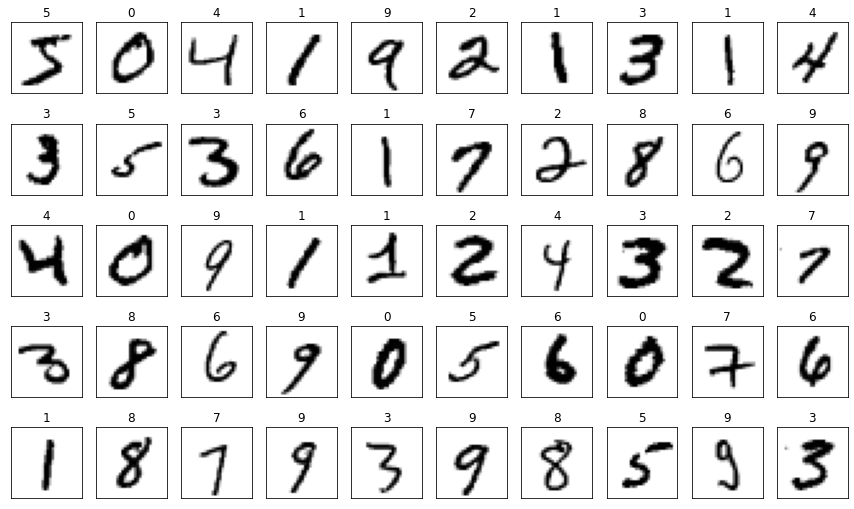

In [ ]:
fig = plt.figure(figsize = (15, 9))

for i in range(50):
    plt.subplot(5, 10, 1+i)
    plt.title(train_labels[i])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i].reshape(28,28), cmap='binary')

### Preprocessing Data

* Preprocess data by reshaping it into the shape that the network expects, and scaling it so that all values are in the [0, 1] interval.
* Training images are stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval.
* Transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.



In [ ]:
np.set_printoptions(linewidth=np.inf)
print('{}'.format(train_images[2022]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  48  18   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   3  71 149 223 242 230 223 153  29   1   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  14 185 254 254 254 254 240 251 254 254 100   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  64 209 254 206 138  65  65  43  60 151 254 249  65   

1. Each element in the image is a pixel value between 0 to 255.
3. As 0 = White and 255 = Black, the non-negative values display the digit "2" in this image. 

### Reshaping the images to 1D arrays and rescaling elements between 0 and 1. 

*  As the [0, 255] range is not ideal for a neural network, make the input values small, between 0 and 1.



In [ ]:
train_images_reshaped = train_images.reshape((60000, 28 * 28))
train_images_norm = train_images_reshaped.astype('float32') / 255

test_images_reshaped = test_images.reshape((10000, 28 * 28))
test_images_norm = test_images_reshaped.astype('float32') / 255

In [ ]:
print('train_images_norm shape: ', train_images_norm.shape)
print('test_images_norm shape: ', test_images_norm.shape)

train_images_norm shape:  (60000, 784)
test_images_norm shape:  (10000, 784)


In [ ]:
np.set_printoptions(linewidth=np.inf)
print('{}'.format(train_images_norm[2022]))

[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.188 0.071 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0. 

### Applying one-hot encoding on the labels
* obtain vectors (1D arrays) of shape (10, ) with all the elements set to 0 except the one which the label belongs, which will be set to 1. 



In [ ]:
train_labels_encoded = to_categorical(train_labels)
test_labels_encoded = to_categorical(test_labels)

In [ ]:
print('First ten entries of train_labels:\n{}\n'.format(train_labels[0:10]))
print('First ten entries of one-hot train_labels:\n{}'.format(train_labels_encoded[0:10]))

First ten entries of train_labels:
[5 0 4 1 9 2 1 3 1 4]

First ten entries of one-hot train_labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In the training set, after performing one-hot encoding, the first label is presented as [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] and it is a 5, the second label is presented as [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] and it is a 0, and so on.

In [ ]:
print('train_labels_encoded shape:', train_labels_encoded.shape)

train_labels_encoded shape: (60000, 10)


The first reshaped and normalized training image:

In [ ]:
print(set(train_images_norm[0]))

{0.0, 0.011764706, 0.53333336, 0.07058824, 0.49411765, 0.6862745, 0.101960786, 0.6509804, 1.0, 0.96862745, 0.49803922, 0.11764706, 0.14117648, 0.36862746, 0.6039216, 0.6666667, 0.043137256, 0.05490196, 0.03529412, 0.85882354, 0.7764706, 0.7137255, 0.94509804, 0.3137255, 0.6117647, 0.41960785, 0.25882354, 0.32156864, 0.21960784, 0.8039216, 0.8666667, 0.8980392, 0.7882353, 0.52156866, 0.18039216, 0.30588236, 0.44705883, 0.3529412, 0.15294118, 0.6745098, 0.88235295, 0.99215686, 0.9490196, 0.7647059, 0.2509804, 0.19215687, 0.93333334, 0.9843137, 0.74509805, 0.7294118, 0.5882353, 0.50980395, 0.8862745, 0.105882354, 0.09019608, 0.16862746, 0.13725491, 0.21568628, 0.46666667, 0.3647059, 0.27450982, 0.8352941, 0.7176471, 0.5803922, 0.8117647, 0.9764706, 0.98039216, 0.73333335, 0.42352942, 0.003921569, 0.54509807, 0.67058825, 0.5294118, 0.007843138, 0.31764707, 0.0627451, 0.09411765, 0.627451, 0.9411765, 0.9882353, 0.95686275, 0.83137256, 0.5176471, 0.09803922, 0.1764706}


### Creating the DNN Model

* The network has three fully-connected Dense layers
* The output layer is a 10-way "softmax" layer which returns an array of 10 probability scores. 
* Each score will be the probability that the current digit image belongs to one of our 10 classes.



In [ ]:
# Buidling the model
# The following variables are the hyperparameters:

my_learning_rate = 0.001 #(default))
my_epochs = 70
my_batch_size = 100

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=[784]))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))  

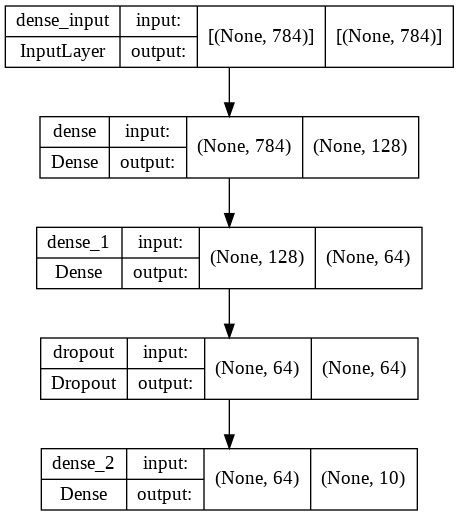

In [ ]:
keras.utils.plot_model(model, 'model.png', show_shapes=True) 

In [ ]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model
'''
Optimizer (Root Mean Squared Propagation) for the network to update itself based on the data it sees and its loss function. 
Loss function — The loss function is the difference between the predicted output and the actual output. 
Metrics - Accuracy shows the fraction of the images that were correctly classified.
'''
model.compile(tf.keras.optimizers.RMSprop(lr=my_learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model - fit the model to its training data
history = model.fit(train_images_norm,
                    train_labels_encoded,
                    epochs = my_epochs,
                    batch_size = my_batch_size,
                    validation_split=0.20,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)])

Train on 48000 samples, validate on 12000 samples
Epoch 1/70
48000/48000 [==============================] - 2s 44us/sample - loss: 0.5019 - accuracy: 0.8750 - val_loss: 0.2485 - val_accuracy: 0.9477
Epoch 2/70
48000/48000 [==============================] - 2s 38us/sample - loss: 0.2549 - accuracy: 0.9445 - val_loss: 0.1906 - val_accuracy: 0.9616
Epoch 3/70
48000/48000 [==============================] - 2s 37us/sample - loss: 0.1905 - accuracy: 0.9592 - val_loss: 0.1550 - val_accuracy: 0.9686
Epoch 4/70
48000/48000 [==============================] - 2s 38us/sample - loss: 0.1513 - accuracy: 0.9675 - val_loss: 0.1355 - val_accuracy: 0.9722
Epoch 5/70
48000/48000 [==============================] - 2s 38us/sample - loss: 0.1278 - accuracy: 0.9729 - val_loss: 0.1392 - val_accuracy: 0.9706
Epoch 6/70
48000/48000 [==============================] - 2s 37us/sample - loss: 0.1097 - accuracy: 0.9773 - val_loss: 0.1237 - val_accuracy: 0.9722
Epoch 7/70
48000/48000 [==============================] 

In [ ]:
# Testing the model on the test dataset
test_loss, test_acc = model.evaluate(test_images_norm, test_labels_encoded)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc*100))

Test Loss: 0.09333638383001089
Test Accuracy: 97.93999791145325


### Making Predictions

In [ ]:
preds = model.predict(test_images_norm)
print('Shape of predictions:', preds.shape)

Shape of predictions: (10000, 10)


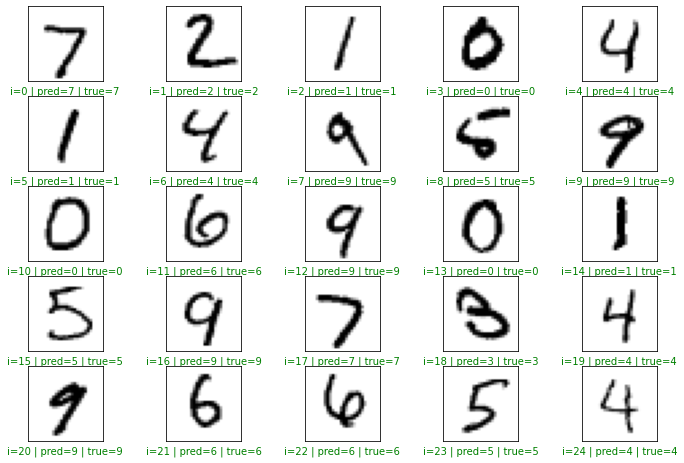

In [ ]:
# Plotting the first 25 records of test set images along with their predicted and actual labels to see how the trained model performed

plt.figure(figsize = (12, 8))
start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index + i])
    actual = np.argmax(test_labels_encoded[start_index + i])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(test_images[start_index + i], cmap='binary')
plt.show()

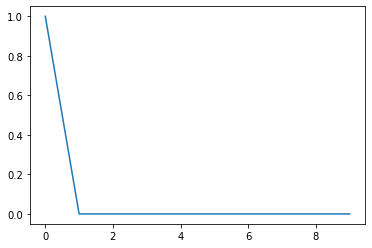

In [ ]:
# Plotting the index 10 
index = 10
plt.plot(preds[index])
plt.show()

### Reviewing Performance




* with Matplotlib, display the training and validation loss and training and validation accuracy for each training epoch.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

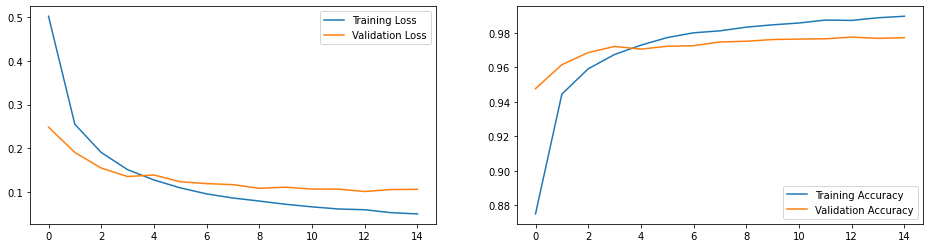

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [ ]:
pred= model.predict(test_images_norm)
pred=np.argmax(pred, axis=1)
print_validation_report(test_labels, pred)

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Accuracy Score: 0.9794
Root Mean Square Error: 0.6166036003787198


### Evaluating the performance with confussion matrix

In [ ]:
# Get the predicted classes:
pred_classes = np.argmax(model.predict(test_images_norm), axis=1)
pred_classes

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
conf_mx = tf.math.confusion_matrix(test_labels, pred_classes)
conf_mx

<tf.Tensor 'confusion_matrix/ScatterNd:0' shape=(10, 10) dtype=int32>

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)
df = pd.DataFrame(preds[0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2,3,4,5,6,7,8,9
0,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,100.00%,0.00%,0.00%
1,0.00%,0.00%,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
2,0.00%,99.98%,0.00%,0.00%,0.01%,0.00%,0.00%,0.00%,0.00%,0.00%
3,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
4,0.00%,0.00%,0.00%,0.00%,99.95%,0.00%,0.00%,0.00%,0.00%,0.05%
5,0.00%,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
6,0.00%,0.00%,0.00%,0.00%,99.96%,0.00%,0.00%,0.00%,0.00%,0.03%
7,0.00%,0.01%,0.01%,8.01%,0.02%,0.01%,0.00%,0.05%,0.00%,91.89%
8,0.00%,0.00%,0.00%,0.00%,0.00%,96.50%,3.49%,0.00%,0.00%,0.00%
9,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,100.00%


### Visualizing the confusion matrix


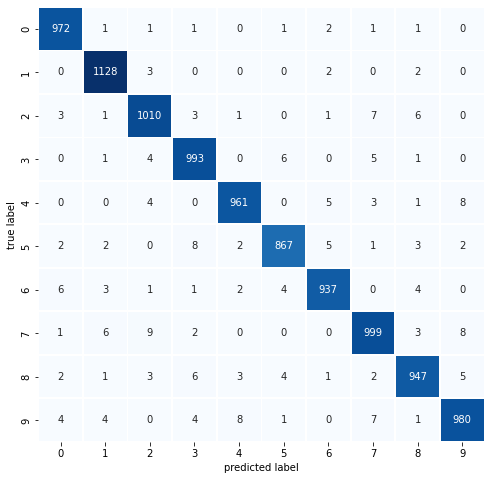

In [ ]:
plot_confusion_matrix(test_labels,pred_classes)

9 of 7 were misclassified as 2 and 7 of 2 were misclassified as 2
We display some of these misclassifications and the 7 and 2 correctly identified.

In [ ]:
def plot_digits(instances, pos, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    pos.imshow(image, cmap = 'binary', **options)
    pos.axis("off")

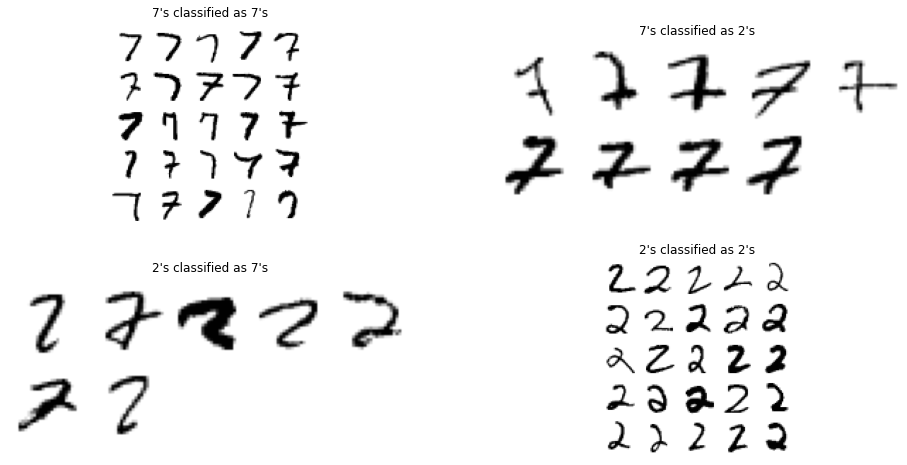

In [ ]:
cl_a, cl_b = 7,2
X_aa = test_images_norm[(test_labels == cl_a) & (pred_classes == cl_a)]
X_ab = test_images_norm[(test_labels == cl_a) & (pred_classes == cl_b)]
X_ba = test_images_norm[(test_labels == cl_b) & (pred_classes == cl_a)]
X_bb = test_images_norm[(test_labels == cl_b) & (pred_classes == cl_b)]

plt.figure(figsize=(16,8))

p1 = plt.subplot(221)
p2 = plt.subplot(222)
p3 = plt.subplot(223)
p4 = plt.subplot(224)

plot_digits(X_aa[:25], p1, images_per_row=5);
plot_digits(X_ab[:25], p2, images_per_row=5);
plot_digits(X_ba[:25], p3, images_per_row=5);  
plot_digits(X_bb[:25], p4, images_per_row=5);


p1.set_title(f"{cl_a}'s classified as {cl_a}'s")
p2.set_title(f"{cl_a}'s classified as {cl_b}'s")
p3.set_title(f"{cl_b}'s classified as {cl_a}'s")
p4.set_title(f"{cl_b}'s classified as {cl_b}'s")

plt.savefig("error_analysis_digits_plot_EXP1_valid")

plt.show()

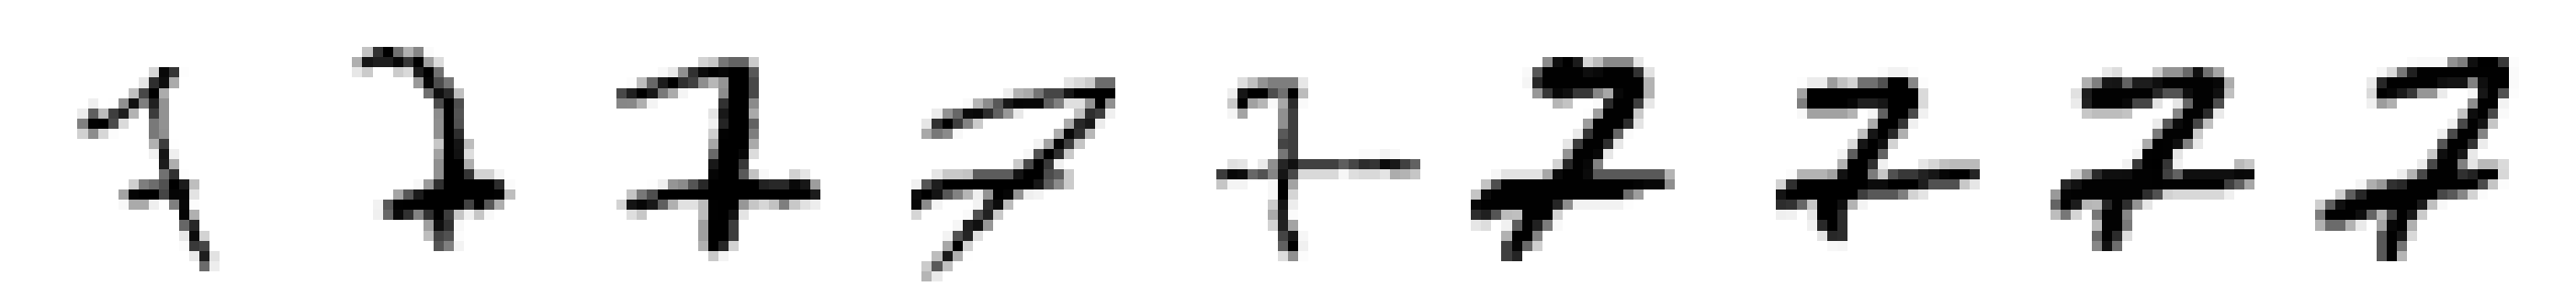

In [ ]:
# display all the 7 classified as 2
num = X_ab.shape[0]
plt.figure(figsize=(50,50))
plot_digits(X_ab[:num],plt, images_per_row = 20)


### Analyzing the Activation Values of the Hidden Node

* We need to create a new model, activation_model, that takes the same input as our current model, but outputs the activation value of the hidden layer, i.e. of the hidden node. Then use the predict function to get the activation values.







In [ ]:
# Extracts the outputs of the 2 layers:
layer_outputs = [layer.output for layer in model.layers]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

print(f"There are {len(layer_outputs)} layers")
layer_outputs # description of the layers


There are 4 layers


[<tf.Tensor 'dense/Relu:0' shape=(None, 128) dtype=float32>,
 <tf.Tensor 'dense_1/Relu:0' shape=(None, 64) dtype=float32>,
 <tf.Tensor 'dropout/cond/Identity:0' shape=(None, 64) dtype=float32>,
 <tf.Tensor 'dense_2/Softmax:0' shape=(None, 10) dtype=float32>]

In [ ]:
# Get the output of the hidden node for each of the 60000 training images
activations = activation_model.predict(train_images_norm)
hidden_layer_activation = activations[0]
output_layer_activations = activations[1]

In [ ]:
hidden_layer_activation.shape   #  hidden node has one activation value per training image

(60000, 128)

In [ ]:
output_layer_activations.shape

(60000, 64)

In [ ]:
print(f"The maximum activation value of the hidden node is {hidden_layer_activation.max()}")

The maximum activation value of the hidden node is 13.569952011108398


In [ ]:
# Some stats about the output layer 
np.set_printoptions(suppress = True)  # display probabilities as decimals and NOT in scientific notation
output_layer_activation = activations[1]
print(f"The output node has shape {output_layer_activation.shape}")
print(f"The outputs for the first image are {output_layer_activation[0].round(4)}")
print(f"The sum of the probabilities is (approximately) {output_layer_activation[0].sum()}")

The output node has shape (60000, 64)
The outputs for the first image are [0.    2.69  0.    0.    0.671 0.    0.    0.    0.    0.    1.991 0.    0.    2.11  0.    1.485 2.594 0.887 0.036 1.794 2.083 0.    2.177 0.    0.    1.668 0.    0.212 0.    0.    0.    1.201 0.643 0.    1.524 2.438 0.    1.369 0.    1.584 2.22  0.964 0.    0.    0.    0.    0.    0.    0.    0.826 0.    0.    0.    0.645 0.    1.587 0.    0.755 0.749 0.883 2.866 0.28  0.    0.097]
The sum of the probabilities is (approximately) 41.031761169433594


### Creating a dataframe with the activation values and the class labels

In [ ]:
#Get the dataframe of all the node values
activation_data = {'actual_class':train_labels}
for k in range(0,1): 
    activation_data[f"act_val_{k}"] = hidden_layer_activation[:,k]

activation_df = pd.DataFrame(activation_data)
activation_df.head(15).round(3).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
actual_class,5.0,0.0,4.000,1.000,9.0,2.0,1.0,3.0,1.0,4.0,3.0,5.000,3.0,6.0,1.0
act_val_0,0.0,0.0,0.471,3.562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.678,0.0,0.0,0.0


### Visualizing the activation values with boxplot
We combine the activation values of the one hidden node with the corresponding predicted class labels into a DataFrame
to see how closely they correlate. So, we try to find a pattern the hidden node maximally responds to.
We use both matplotlib and seaborn to create boxplots from the DataFrame.

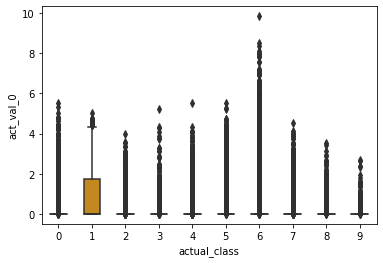

In [ ]:
bplot = sns.boxplot(y='act_val_0', x='actual_class', 
                 data=activation_df[['act_val_0','actual_class']], 
                 width=0.5,
                 palette="colorblind")

In [ ]:
# displaying the range of activation values for each class labels
activation_df.groupby("actual_class")["act_val_0"].apply(lambda x: [round(min(x.tolist()),2),
round(max(x.tolist()),2)]).reset_index().rename(columns={"act_val_0": "range_of_act_values"})

,actual_class,range_of_act_values
0,0,"[0.0, 5.5]"
1,1,"[0.0, 5.02]"
2,2,"[0.0, 3.97]"
3,3,"[0.0, 5.21]"
4,4,"[0.0, 5.5]"
5,5,"[0.0, 5.5]"
6,6,"[0.0, 9.82]"
7,7,"[0.0, 4.54]"
8,8,"[0.0, 3.53]"
9,9,"[0.0, 2.66]"


In [ ]:
activation_df["actual_class"].value_counts() 

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: actual_class, dtype: int64